In [1]:
from neural_net_utils import *
from feature_selection_utils import *

### Sfida tra `GradientBoostingRegressor` e `RegressionNet`

#### Feature analysis e selection con `GradientBoostingRegressor` (addestrato sul dataset `movies_not_binned.csv`)

In [2]:
df = pd.read_csv('../dataset/movies_not_binned.csv')

cols_to_retain = ['rating', 'genre', 'score', 'profit', 'age', 'runtime', 'votes', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'score',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['profit', 'votes', 'budget',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std'],
    'standardize': ['runtime', 'director_age', 'actor_age'],
    'minmax': ['age', 'profit', 'votes', 'budget',
               'director_num_movies', 'actor_num_movies',
               'director_profit_mean', 'actor_profit_mean',
               'director_profit_std', 'actor_profit_std',
               'director_score_mean', 'actor_score_mean',
               'director_score_std', 'actor_score_std']
}

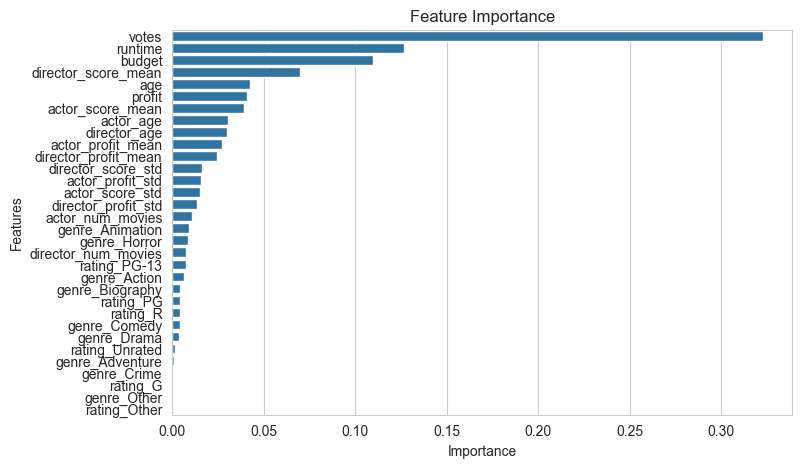

In [3]:
# studio l'importanza delle features
model_name = 'Gradient_Boosting_Regressor-not_binned'

study_model_with_best_features(model_name, df, cols, retain='all')

In [4]:
# scelgo il numero di features da mantenere e procedo con una RFE manuale, poi confronto i risultati

k = 11
study_model_with_best_features(model_name, df, cols, retain=k)

Removing genre_Action with importance 0.0006319223768053162
Removing genre_Other with importance 0.00022694187016503165
Removing actor_num_movies with importance 0.0006798520963452459
Removing genre_Animation with importance 3.8268595964841e-05
Removing director_profit_mean with importance 9.663110530566676e-05
Removing genre_Comedy with importance 0.00011289034632161465
Removing rating_G with importance 0.0006401516174475153
Removing actor_score_mean with importance 0.0004920556345797134
Removing director_num_movies with importance 0.002125276093374928
Removing rating_PG with importance 0.00010361469196501494
Removing genre_Crime with importance 0.00011592610898975009
Removing actor_score_std with importance 0.000531527304211632
Removing genre_Drama with importance 4.82396922030226e-05
Removing actor_profit_std with importance 0.00045307404838035303
Removing director_profit_std with importance 2.5892917855485642e-05
Removing director_age with importance 0.0010256436186258377
Removing 

,feature
0,profit
1,age
2,runtime
3,votes
4,budget
5,director_score_mean
6,director_score_std
7,actor_age
8,actor_profit_mean
9,rating_PG-13


Results after GridSearchCV:
Best parameters: {'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 8}
Best score: {'mean_squared_error': 0.4319}

Results after max_depth tuning:
Best parameters: {'max_depth': 4}
Best score: {'mean_squared_error': 0.4319}



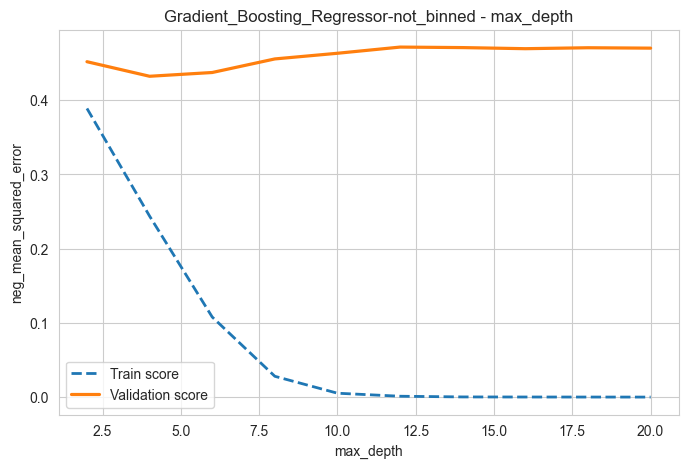

Test score:
MSE: 0.4164


In [4]:
# tuning e test dello stesso modello con le features più importanti
grid_params = {
    'max_depth': [4, 6],
    'min_samples_leaf': [6, 8, 10],
    'min_samples_split': [8, 10, 12],
}

best_features = ['votes', 'runtime', 'budget', 'age', 'profit',
                 'director_score_mean', 'actor_score_mean',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_age', 'actor_age']

study_model_with_best_features(model_name, df, cols, best_features=best_features, grid_params=grid_params, task='regression')

#### Addestramento di `RegressionNet` solo sul dataset originale `movies_v2.csv`

In [3]:
df = pd.read_csv('../dataset/movies_v2.csv')

# colonne per l'addestramento
cols_to_retain = ['rating', 'genre', 'year', 'score', 'votes', 'budget', 'gross', 'runtime']

cols = {
    'target': 'score',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['votes', 'budget', 'gross'],
    'standardize': ['runtime'],
    'minmax': ['year', 'votes', 'budget', 'gross']
}

Epoch 1 | train loss: 15.8490, val loss: 1.1123
Epoch 2 | train loss: 4.7631, val loss: 1.4194
Early-stopping counter: 1/12
Epoch 3 | train loss: 4.4535, val loss: 1.4910
Early-stopping counter: 2/12
Epoch 4 | train loss: 4.0694, val loss: 1.1593
Early-stopping counter: 3/12
Epoch 5 | train loss: 3.8983, val loss: 0.5590
Val loss (inf --> 0.5590)
Epoch 6 | train loss: 3.5750, val loss: 0.7320
Early-stopping counter: 1/12
Epoch 7 | train loss: 3.2439, val loss: 0.7027
Early-stopping counter: 2/12
Epoch 8 | train loss: 3.0615, val loss: 0.8046
Early-stopping counter: 3/12
Epoch 9 | train loss: 2.6707, val loss: 0.8011
Early-stopping counter: 4/12
Epoch 10 | train loss: 2.2476, val loss: 0.6781
Early-stopping counter: 5/12
Epoch 11 | train loss: 2.2059, val loss: 0.6291
Early-stopping counter: 6/12
Epoch 12 | train loss: 2.0394, val loss: 0.6122
Early-stopping counter: 7/12
Epoch 13 | train loss: 1.8312, val loss: 0.5836
Early-stopping counter: 8/12
Epoch 14 | train loss: 1.6644, val loss

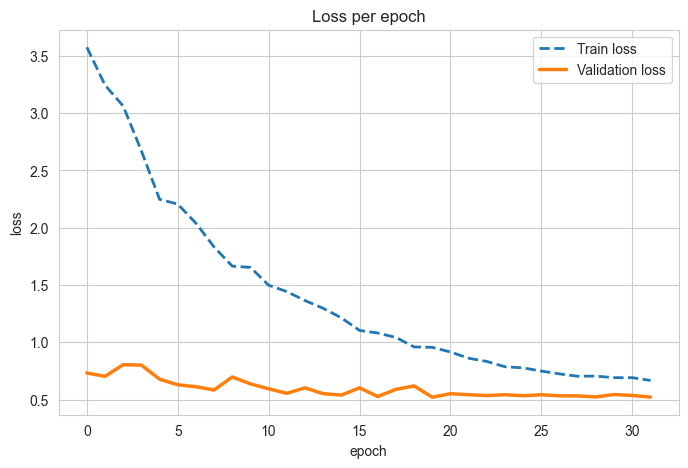


Test loss: 0.4616


In [4]:
train_and_test_net(df, cols, task='regression')

#### Addestramento di `RegressionNet` solo sul dataset `movies_not_binned.csv` (solo con le $k$ features più importanti)

In [5]:
df = pd.read_csv('../dataset/movies_not_binned.csv')

cols_to_retain = ['rating', 'genre', 'score', 'profit', 'age', 'runtime', 'votes', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'score',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['profit', 'votes', 'budget',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std'],
    'standardize': ['runtime', 'director_age', 'actor_age'],
    'minmax': ['age', 'profit', 'votes', 'budget',
               'director_num_movies', 'actor_num_movies',
               'director_profit_mean', 'actor_profit_mean',
               'director_profit_std', 'actor_profit_std',
               'director_score_mean', 'actor_score_mean',
               'director_score_std', 'actor_score_std']
}

Epoch 1 | train loss: 16.1057, val loss: 1.3351
Epoch 2 | train loss: 4.7332, val loss: 0.9944
Val loss (inf --> 0.9944)
Epoch 3 | train loss: 4.2728, val loss: 1.1457
Early-stopping counter: 1/12
Epoch 4 | train loss: 3.9314, val loss: 1.0129
Early-stopping counter: 2/12
Epoch 5 | train loss: 3.2646, val loss: 0.8373
Val loss (0.9944 --> 0.8373)
Epoch 6 | train loss: 3.1666, val loss: 0.7038
Val loss (0.8373 --> 0.7038)
Epoch 7 | train loss: 2.7959, val loss: 0.6654
Val loss (0.7038 --> 0.6654)
Epoch 8 | train loss: 2.5917, val loss: 0.6290
Val loss (0.6654 --> 0.6290)
Epoch 9 | train loss: 2.2897, val loss: 0.8039
Early-stopping counter: 1/12
Epoch 10 | train loss: 2.0793, val loss: 0.7177
Early-stopping counter: 2/12
Epoch 11 | train loss: 1.9233, val loss: 0.7384
Early-stopping counter: 3/12
Epoch 12 | train loss: 1.7580, val loss: 0.8192
Early-stopping counter: 4/12
Epoch 13 | train loss: 1.7360, val loss: 0.7258
Early-stopping counter: 5/12
Epoch 14 | train loss: 1.6472, val loss

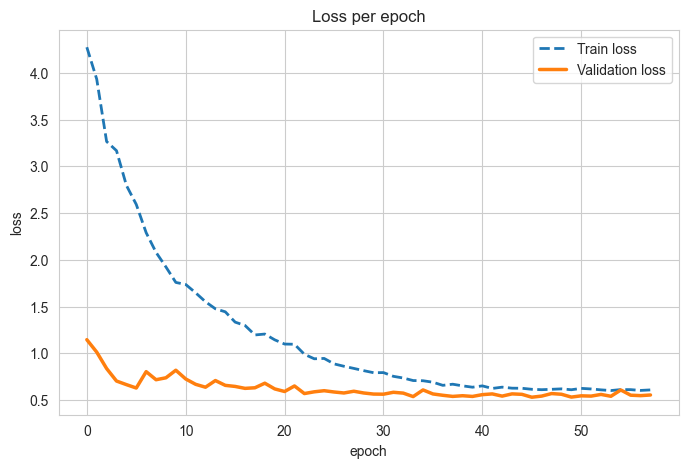


Test loss: 0.4682


In [6]:
best_features = ['votes', 'runtime', 'budget', 'age', 'profit',
                 'director_score_mean', 'actor_score_mean',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_age', 'actor_age']

train_and_test_net(df, cols, features=best_features, task='regression')

### Sfida tra `RandomForestClassifier` e `ClassificationNet`

#### Feature analysis e selection con `RandomForestClassifier` (addestrato sul dataset `movies_not_binned.csv`)

In [7]:
df = pd.read_csv('../dataset/movies_not_binned.csv')

# colonne per l'addestramento
cols_to_retain = ['rating', 'genre', 'profitability', 'cultness', 'age', 'runtime', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'profitability',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['budget', 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std'],
    'standardize': ['cultness', 'runtime', 'director_age', 'actor_age'],
    'minmax': ['age', 'budget', 'director_num_movies', 'actor_num_movies',
               'director_profit_mean', 'actor_profit_mean',
               'director_profit_std', 'actor_profit_std',
               'director_score_mean', 'actor_score_mean',
               'director_score_std', 'actor_score_std']
}

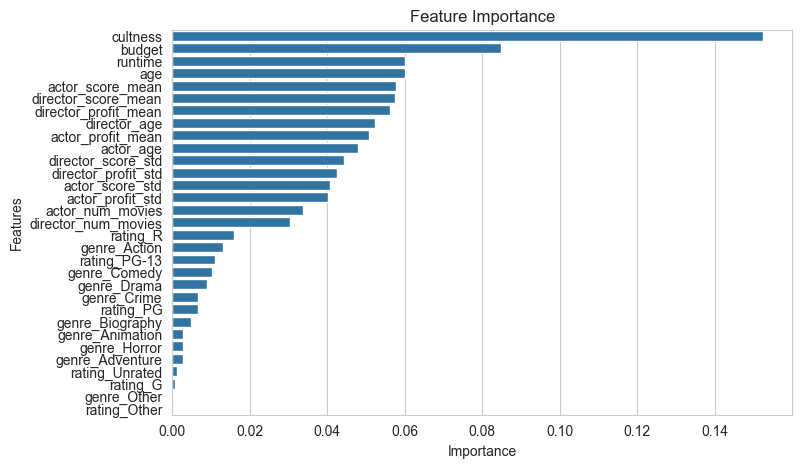

In [8]:
model_name = 'Random_Forest_Classifier-not_binned'

study_model_with_best_features(model_name, df, cols, retain='all')

In [9]:
# scelgo il numero di features da mantenere e procedo con una RFE manuale, poi confronto i risultati

k = 14
study_model_with_best_features(model_name, df, cols, retain=k, resample=True, task='classification')

Removing "director_profit_mean" with importance 0.0015
Removing "director_age" with importance 0.0007
Removing "genre_Comedy" with importance 0.0000
Removing "actor_score_mean" with importance 0.0000
Removing "actor_profit_mean" with importance 0.0007
Removing "genre_Animation" with importance 0.0000
Removing "actor_num_movies" with importance 0.0000
Removing "director_score_mean" with importance 0.0022
Removing "director_score_std" with importance 0.0007
Removing "genre_Adventure" with importance 0.0000
Removing "rating_Unrated" with importance 0.0000
Removing "rating_R" with importance 0.0000
Removing "actor_profit_std" with importance 0.0000
Removing "actor_age" with importance 0.0007
Removing "genre_Other" with importance 0.0000
Removing "rating_G" with importance 0.0059
Removing "genre_Biography" with importance 0.0015


,feature
0,cultness
1,age
2,runtime
3,budget
4,director_num_movies
5,director_profit_std
6,actor_score_std
7,rating_Other
8,rating_PG
9,rating_PG-13


Results after GridSearchCV:
Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: {'accuracy': 0.7240}

Results after max_depth tuning:
Best parameters: {'max_depth': 22}
Best score: {'accuracy': 0.7253}



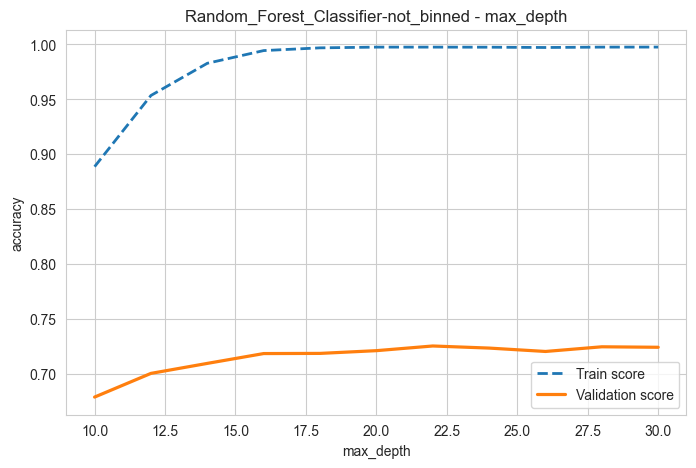

Test score:
Accuracy: 0.6489


In [10]:
# tuning e test dello stesso modello con le features più importanti
grid_params = {
    'max_depth': [15, 20, 25],
    'min_samples_leaf': [2, 4, 8],
    'min_samples_split': [2, 4, 8],
}

best_features = ['cultness', 'budget', 'runtime', 'age',
                 'director_score_mean', 'actor_score_mean',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std',
                 'director_num_movies', 'actor_num_movies',
                 'director_age', 'actor_age']

study_model_with_best_features(model_name, df, cols, best_features=best_features, grid_params=grid_params, resample=True, task='classification')

#### Addestramento di `ClassificationNet` solo sul dataset `movies_not_binned.csv` (solo con le $k$ features più importanti)

In [11]:
df = pd.read_csv('../dataset/movies_not_binned.csv')

# colonne per l'addestramento
cols_to_retain = ['rating', 'genre', 'profitability', 'cultness', 'age', 'runtime', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'profitability',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['budget', 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std'],
    'standardize': ['cultness', 'runtime', 'director_age', 'actor_age'],
    'minmax': ['age', 'budget', 'director_num_movies', 'actor_num_movies',
               'director_profit_mean', 'actor_profit_mean',
               'director_profit_std', 'actor_profit_std',
               'director_score_mean', 'actor_score_mean',
               'director_score_std', 'actor_score_std']
}

In [12]:
best_features = ['cultness', 'budget', 'runtime', 'age',
                 'director_score_mean', 'actor_score_mean',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std',
                 'director_num_movies', 'actor_num_movies',
                 'director_age', 'actor_age']

# addestramento con resampling
train_and_test_net(df, cols, features=best_features, resample=True, task='classification')

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
best_features = ['cultness', 'budget', 'runtime', 'age',
                 'director_score_mean', 'actor_score_mean',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std',
                 'director_num_movies', 'actor_num_movies',
                 'director_age', 'actor_age']

# addestramento senza resampling
train_and_test_net(df, cols, features=best_features, resample=False, task='classification')